In [28]:
import pandas as pd
import numpy as np

import re
from tqdm import tqdm
from konlpy.tag import Okt

In [29]:
train = pd.read_csv('data/unsmile_train_new.csv')
test = pd.read_csv('data/unsmile_valid_new.csv')

In [30]:
train.drop_duplicates(subset = ['문장'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
train['문장'] = train['문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
train['문장'] = train['문장'].str.replace('^ +', "") # 공백은 empty 값으로 변경
train['문장'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
train = train.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(train))

전처리 후 테스트용 샘플의 개수 : 22479


/var/folders/j7/1z0h6p4d553cqf5_7bw8dym00000gn/T/ipykernel_77106/198297000.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train['문장'] = train['문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/var/folders/j7/1z0h6p4d553cqf5_7bw8dym00000gn/T/ipykernel_77106/198297000.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['문장'] = train['문장'].str.replace('^ +', "") # 공백은 empty 값으로 변경


In [31]:
test.drop_duplicates(subset = ['문장'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test['문장'] = test['문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test['문장'] = test['문장'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test['문장'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test = test.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test))

전처리 후 테스트용 샘플의 개수 : 5592


/var/folders/j7/1z0h6p4d553cqf5_7bw8dym00000gn/T/ipykernel_77106/1308857970.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['문장'] = test['문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/var/folders/j7/1z0h6p4d553cqf5_7bw8dym00000gn/T/ipykernel_77106/1308857970.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test['문장'] = test['문장'].str.replace('^ +', "") # 공백은 empty 값으로 변경


In [32]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [33]:
okt = Okt()

In [34]:
X_train = []
for sentence in tqdm(train['문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|████████████████████████████████████| 22479/22479 [00:35<00:00, 633.68it/s]


In [35]:
X_test = []
for sentence in tqdm(test['문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████████████████████████████████| 5592/5592 [00:08<00:00, 625.16it/s]


In [36]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [37]:
X_train

[['이다', '시간', '쉬다', '그렇다', '아니다'],
 ['아동',
  '성범죄',
  '페도버',
  '기록',
  '바',
  '끊어지다',
  '영원하다',
  '고통',
  '받다',
  '무슬림',
  '퍼',
  '근',
  '친',
  '이다',
  '까지',
  '떨어지다',
  '출산',
  '위험',
  '다'],
 ['루나',
  '솔로',
  '앨범',
  '나오다',
  '때',
  '부터',
  '머모',
  '기운',
  '있다',
  'ㅇㅇ',
  '진짜',
  '띵곡임',
  '꼭',
  '들다',
  '보다'],
 ['홍팍',
  '에도',
  '어버이연합',
  '인가',
  '보내다',
  '뭐',
  '이런',
  '뎃글',
  '있다',
  '거',
  '어버이연합',
  '측',
  '신고',
  '그',
  '쪽',
  '에서',
  '고소',
  '가능하다'],
 ['아',
  '놓다',
  '왜',
  '여기',
  '댓',
  '다',
  '여자',
  '김치',
  '녀',
  '라고',
  '먼저',
  '불리다',
  '여자',
  '더',
  '심하다',
  '그렇다',
  '이렇게',
  '개',
  '로',
  '싸우다',
  '내',
  '볼',
  '땐',
  '두다',
  '나쁘다',
  '말',
  '그',
  '이상',
  '이하',
  '아니다'],
 ['고',
  '향가',
  '서',
  '피방',
  '가면',
  '동네',
  '부럴',
  '친구',
  '이랑은',
  '뭐',
  '거르',
  '거',
  '없이',
  '이야기',
  '막',
  '말',
  '되다',
  '당연하다',
  '키',
  '보드',
  '치다',
  '그렇다',
  '않다',
  '말',
  '많이',
  '거치다',
  '해',
  '반성'],
 ['예수',
  '십',
  '새끼',
  '개새끼',
  '창녀',
  '아들',
  '애비',
  '실종',
  '가정교육',
  '못',


In [38]:
# 빈도수가 낮은 단어들이 훈련 데이터에서 얼만큼의 비중을 차지가
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 24044
등장 빈도가 2번 이하인 희귀 단어의 수: 14816
단어 집합에서 희귀 단어의 비율: 61.62036266844119
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.969665415823493


In [39]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9229


In [40]:
tokenizer = Tokenizer(vocab_size) # 빈도수 2 이하인 단어는 제거
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [41]:
y_train = np.array(train['target'])
y_test = np.array(test['target'])

In [42]:
print(len(X_train))
print(len(y_train))

22479
22479


In [43]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [44]:
len(drop_train)

56

In [45]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

/Users/hk/miniforge3/envs/tf/lib/python3.8/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [46]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

22423
22423
5592
5592


In [47]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)

print(len(X_test))
print(len(y_test))

5571
5571


In [48]:
import matplotlib.pyplot as plt

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.306471034205948


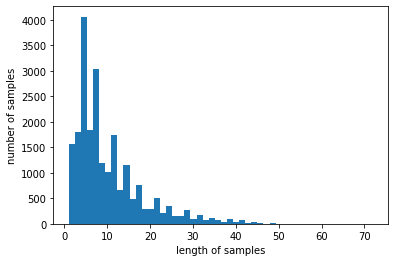

In [49]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [50]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [51]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 96.43669446550417


In [52]:
from keras.preprocessing.sequence import pad_sequences

In [53]:
# 전체 데이터의 길이는 30으로 맞춘다.
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [54]:
embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
# model.add(Bidirectional(LSTM(hidden_units))) # Bidirectional LSTM을 사용
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_LSTM.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/10
281/281 [==============================] - 8s 28ms/step - loss: 0.4177 - acc: 0.8061 - val_loss: 0.4659 - val_acc: 0.7924

Epoch 00001: val_acc improved from -inf to 0.79242, saving model to best_model_LSTM.h5
Epoch 2/10
281/281 [==============================] - 8s 28ms/step - loss: 0.2822 - acc: 0.8766 - val_loss: 0.4624 - val_acc: 0.8011

Epoch 00002: val_acc improved from 0.79242 to 0.80111, saving model to best_model_LSTM.h5
Epoch 3/10
281/281 [==============================] - 8s 28ms/step - loss: 0.2513 - acc: 0.8930 - val_loss: 0.6188 - val_acc: 0.7202

Epoch 00003: val_acc did not improve from 0.80111
Epoch 4/10
281/281 [==============================] - 8s 28ms/step - loss: 0.2310 - acc: 0.9014 - val_loss: 0.5822 - val_acc: 0.7492

Epoch 00004: val_acc did not improve from 0.80111
Epoch 5/10
281/281 [==============================] - 8s 28ms/step - loss: 0.2146 - acc: 0.9091 - val_loss: 0.5581 - val_acc: 0.7400

Epoch 00005: val_acc did not improve from 0.80111
Epo

In [55]:
loaded_model = load_model('best_model_LSTM.h5')

print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

175/175 [==============================] - 1s 5ms/step - loss: 0.3404 - acc: 0.8526

 테스트 정확도: 0.8526


In [56]:
preds = loaded_model.predict(X_test)

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_test, y_test)

# roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) 
AUC = roc_auc_score(y_test, preds)     

# y_pred = model.predict(test_labels)
precision = precision_score(y_test, np.round(abs(preds))) 
f1 = f1_score(y_test, np.round(abs(preds))) 

print("AUC : ", AUC)
print("Precision Score : ", precision)
print("f1 Score : ", f1)

AUC :  0.9320852324603665
Precision Score :  0.8393960192175703
f1 Score :  0.8562926658498161
